importing important libraries such as pandas ,numpy and matplotlib
 sklearn will be imported later.

In [1]:
import numpy as np
import matplotlib.pyplot as mat
import pandas as pd
%matplotlib inline

storing the customers data in a data frame

In [2]:
df=pd.read_csv("Ecommerce Customers")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.describe()#observing the data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


as we want to find out the dependent and independent variable.

In [5]:
df.columns #to check all the variables

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

as we want to check the features due to which yearly amount spent increases yearly amount spent will become the dependent variable and the rest like avg session length, time on website, length of membership, time on app  will become indepent variables.

assigning the independent variable as y and the dependent variable as x.

In [8]:
y=df['Yearly Amount Spent']

In [9]:
X=df[['Time on Website', 'Length of Membership','Avg. Session Length', 'Time on App']]

importing train_test_split from sklearn , to split the data in test and train with size=0.3 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

importing linearregresion from sklearn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

fitting our linearregression model with train data

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

using this to predict the x_test set of data

In [17]:
pred=lm.predict(X_test)

creating a scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'Predicted Data')

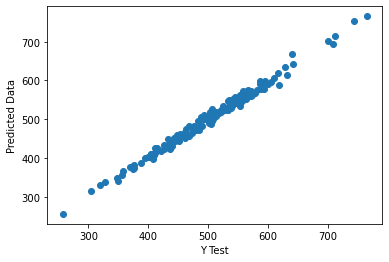

In [18]:
mat.scatter(y_test,pred)
mat.xlabel('Y Test')
mat.ylabel('Predicted Data')

CONCLUSION:
creating a dataframe of lm.coef and X.columns 

In [20]:
coefficients=pd.DataFrame(lm.coef_,X.columns)
coefficients.columns=['coefficients']
coefficients

,coefficients
Time on Website,0.190405
Length of Membership,61.279097
Avg. Session Length,25.981550
Time on App,38.590159


#so this dataframe indicates that:
#- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an
#  **increase of 25.98 total dollars spent**.
#- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an
#  **increase of 38.59 total dollars spent**.
#- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an 
# **increase of 0.19 total dollars spent**.
#- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with 
# an **increase of 61.27 total dollars spent**.

 so the company should focus more on mobile app or their website. there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app,or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company
